# Valuation Visualization Analysis

---


## This analysis uses Financial Modeling Prep's API

https://financialmodelingprep.com/developer/docs/

In [4]:
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from pathlib import Path
import os
import time
import json
import datetime

# PyViz imports
import plotly.express as px
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

#### User sets their unique .env path and ticker_path

In [5]:
# David Load .env, api_key, and ticker_path

#David
env_path = Path(r'C:\Users\david\Dropbox\Learning\Northwestern\Project1\.env')

load_dotenv(env_path)
api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# Set file variable for csv of tickers symbols
ticker_path = Path('Resources/dow_tickers.csv')

# Confirm if load_dotenv worked. Remove this later!
load_dotenv()

True

In [6]:
# # Marshall Load .env, api_key, and ticker_path

# #Marshall
# env_path = Path('/Users/marshallwolfe/Desktop') / '.env'

# load_dotenv(env_path)
# api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# # Set file variable for csv of tickers symbols
# ticker_path = Path('Resources/dow_tickers.csv')

# # Confirm if load_dotenv worked. Remove this later!
# load_dotenv()

True

In [ ]:
# # Amrita Load .env, api_key, and ticker_path

# #Amrita
# env_path = Path(r'C:\Python\.env')

# load_dotenv(env_path)
# api_key = os.getenv('FINANCIAL_MODELING_API_KEY')

# # Set file variable for csv of tickers symbols
# ticker_path = Path(r'C:\Users\amrita.kumari\ValuationVisualization\ValuationVisualization\dow_tickers.csv')

# # Confirm if load_dotenv worked. Remove this later!
# load_dotenv()

#### User sets Pandas DataFrame formatting options

In [6]:
# Pandas DataFrame formatting to see decimals
pd.options.display.float_format = "{:.2f}".format

#### User pulls data from API

In [6]:
# Creation of DataFrame from api
# Tickers DOW, DIS, WBA, RTX, AXP, GS, IBM, INTC, JNJ, JPM, MRK, NKE, PFE have incomplete data for the last 10 years

tickers_df = pd.read_csv(ticker_path, header=None)
tickers = list(tickers_df[0].values)
dow_is_df = pd.DataFrame()
date_list = []
ticker_list = []
price_list = []
revenue_list = []
eps_list = []
pe_list = []
ps_list = []
shares_outstanding_list = []
mkt_cap_list= []

for ticker_name in tickers:

    for year in range(11,-1,-1):

        url = f"https://financialmodelingprep.com/api/v3/income-statement/{ticker_name}?apikey={api_key}"
        requests.get(url).content
        parsed = json.loads(requests.get(url).content)
        
        url2 = f"https://financialmodelingprep.com/api/v3/enterprise-values/{ticker_name}?apikey={api_key}"
        requests.get(url2).content
        parsed2 = json.loads(requests.get(url2).content)
        
        url3 = f"https://financialmodelingprep.com/api/v3/ratios/{ticker_name}?apikey={api_key}"
        requests.get(url3).content
        parsed3 = json.loads(requests.get(url3).content)

        try:
            date_list.append(parsed[year]['date'])
        except:
            date_list.append(np.nan)
            
        ticker_list.append(ticker_name)
        
        try:
            price_list.append(parsed2[year]['stockPrice'])
        except:
            price_list.append(np.nan)
        
        try:
            revenue_list.append(parsed[year]['revenue'])
        except:
            revenue_list.append(np.nan)
    
        try:
            eps_list.append(parsed[year]['eps'])
        except:
            eps_list.append(np.nan)
            
        try:
            pe_list.append(parsed3[year]['priceEarningsRatio'])
        except:
            pe_list.append(np.nan)
            
        try:
            ps_list.append(parsed3[year]['priceSalesRatio'])
        except:
            ps_list.append(np.nan)

        try:
            shares_outstanding_list.append(parsed[year]['weightedAverageShsOut'])
        except:
            shares_outstanding_list.append(np.nan)
            
        try:
            mkt_cap_list.append(parsed2[year]['marketCapitalization'])
        except:
            mkt_cap_list.append(np.nan)
    
dict1 = {'Date': date_list, 'Ticker': ticker_list, 'Stock Price': price_list, 'Revenue': revenue_list, 'EPS': eps_list, 'PE': pe_list, 'PS': ps_list, 'Shares Outstanding': shares_outstanding_list,'Market Cap':mkt_cap_list}

dow_is_df = pd.DataFrame(dict1)

In [43]:
# Export csv of API data
dow_is_df.to_csv('Resources/output2008raw.csv')

#### Load CSV of API data to speed analysis

In [7]:
# Read file path of csv of API data
csv_of_API_path = Path('Resources/output2008raw.csv')

In [8]:
# Read csv of API data into DataFrame
csv_of_API = pd.read_csv(csv_of_API_path)
csv_of_API.drop(columns=["Unnamed: 0"], inplace=True)
csv_of_API.head()

Date Ticker  Stock Price      Revenue  EPS    PE   PS  \
0  2008-12-31    MMM        53.79  25269000000 4.95 10.87 1.49   
1  2009-12-31    MMM        80.49  23123000000 2.04 17.37 2.44   
2  2010-12-31    MMM        87.44  26662000000 5.72 15.28 2.34   
3  2011-12-31    MMM        87.34  29611000000 6.05 14.45 2.09   
4  2012-12-31    MMM       100.80  29904000000 6.40 15.74 2.34   

   Shares Outstanding     Market Cap  
0           699000000 37599210000.00  
1           700500000 56343000000.00  
2           713700000 62405928000.00  
3           708500000 61880390000.00  
4           693900000 69945120000.00

In [9]:
# Show all rows and columns of DataFrame
pd.set_option('display.max_rows',600)
pd.set_option('display.max_columns',50)
df_copy = csv_of_API
df_copy

Date Ticker  Stock Price       Revenue   EPS      PE     PS  \
0    2008-12-31    MMM        53.79   25269000000  4.95   10.87   1.49   
1    2009-12-31    MMM        80.49   23123000000  2.04   17.37   2.44   
2    2010-12-31    MMM        87.44   26662000000  5.72   15.28   2.34   
3    2011-12-31    MMM        87.34   29611000000  6.05   14.45   2.09   
4    2012-12-31    MMM       100.80   29904000000  6.40   15.74   2.34   
5    2013-12-31    MMM       128.05   30871000000  6.83   18.74   2.83   
6    2014-12-31    MMM       162.30   31821000000  7.63   21.26   3.31   
7    2015-12-31    MMM       151.00   30274000000  7.72   19.55   3.12   
8    2016-12-31    MMM       175.42   30109000000  8.35   21.01   3.52   
9    2017-12-31    MMM       251.54   31657000000  8.13   30.94   4.75   
10   2018-12-31    MMM       199.27   32765000000  9.09   21.92   3.58   
11   2019-12-31    MMM       162.51   32136000000  7.92   20.52   2.92   
12   2008-09-27   AAPL        13.16   32479000000  5.48    2.40   0.36   
13   2009-09-26   AAPL        28.93   36537000000  6.39    4.53   0.71   
14   2010-09-25   AAPL        44.12   65225000000 15.41    2.86   0.62   
15   2011-09-24   AAPL        57.97  108249000000 28.05    2.07   0.49   
16   2012-09-29   AAPL        86.29  156508000000 44.64    1.93   0.52   
17   2013-09-28   AAPL        75.70  170910000000 40.03    1.89   0.41   
18   2014-09-27   AAPL       105.11  182795000000  6.49   16.19   3.50   
19   2015-09-26   AAPL       115.28  233715000000  9.28   12.42   2.84   
20   2016-09-24   AAPL       117.65  215639000000  8.35   14.09   2.98   
21   2017-09-30   AAPL       166.72  229234000000  9.27   17.99   3.79   
22   2018-09-29   AAPL       212.24  265595000000 12.01   17.67   3.96   
23   2019-09-28   AAPL       249.05  260174000000 11.97   20.81   4.42   
24   2008-12-31     BA        42.31   60909000000  3.68    5.82   0.51   
25   2009-12-31     BA        60.60   68281000000  1.86   20.87   0.65   
26   2010-12-31     BA        69.23   64306000000  4.49    8.92   0.79   
27   2011-12-31     BA        74.16   68735000000  5.39    8.15   0.80   
28   2012-12-31     BA        74.59   81698000000  5.15    0.02   0.00   
29   2013-12-31     BA       126.53   86623000000  6.03   12.19   1.11   
30   2014-12-31     BA       145.37   90762000000  7.47   11.98   1.17   
31   2015-12-31     BA       120.13   96114000000  7.52    9.03   0.86   
32   2016-12-31     BA       165.57   94571000000  7.70   16.86   1.11   
33   2017-12-31     BA       337.71   93392000000 13.60   17.10   2.18   
34   2018-12-31     BA       387.72  101127000000 18.05   17.62   2.22   
35   2019-12-31     BA       323.30   76559000000 -1.12  -47.09   2.39   
36   2008-12-31    CAT        30.85   51324000000  5.83     nan   0.00   
37   2009-12-31    CAT        52.24   32396000000  1.45     nan   0.00   
38   2010-12-31    CAT        95.68   42588000000  4.28   22.38   1.42   
39   2011-12-31    CAT       110.41   60138000000  7.64   14.45   1.18   
40   2012-12-31    CAT        98.65   65875000000  8.71   11.33   0.98   
41   2013-12-31    CAT        93.20   55656000000  5.87   15.87   1.08   
42   2014-12-31    CAT        79.97   55184000000  5.99   13.36   0.89   
43   2015-12-31    CAT        62.24   47011000000  3.54   17.60   0.79   
44   2016-12-31    CAT        96.79   38537000000 -0.11 -844.10   1.47   
45   2017-12-31    CAT       163.76   45462000000  1.27  128.53   2.13   
46   2018-12-31    CAT       130.11   54722000000 10.39   12.52   1.41   
47   2019-12-31    CAT       135.37   53800000000 10.85   12.48   1.41   
48   2008-12-31    CVX        70.52  273005000000  0.00    6.04   0.53   
49   2009-12-31    CVX        72.12  171636000000  0.00   13.60   0.84   
50   2010-12-31    CVX        93.37    1093000000  0.00    9.51 166.58   
51   2011-12-31    CVX       103.41  253706000000  0.00    7.47   0.79   
52   2012-12-31    CVX       116.45  241909000000 13.42    8.67   0.94   
53   2013-12-31

#### First Derivative Function:

In [10]:
def first_der(dataframe,column_name):

    out_df = dataframe.copy(deep=True)
    
    new_column_name = f'{column_name} 1st Der'

    out_df[new_column_name] = out_df[column_name].pct_change()

    tlist = []
    dran = len(out_df)

    for i in range(dran):
    
        if out_df['Ticker'][i] not in tlist:
            tlist.append(out_df['Ticker'][i])
            out_df[new_column_name][i] = np.nan
    
    return out_df

#### Second Derivative Function:

In [11]:
def second_der(dataframe,column_name):
        
    out_df = dataframe.copy(deep=True)
    
    new_column_name = column_name + ' 2nd Der'
    old_column_name = column_name + ' 1st Der'

    out_df[new_column_name] = out_df[column_name].pct_change()
    
    out_df[new_column_name] = out_df[old_column_name].pct_change()
    
    tlist2 = []
    dran2 = len(out_df)

    for i in range(dran2):
        if out_df['Ticker'][i] not in tlist2:
            tlist2.append(out_df['Ticker'][i])
            out_df[new_column_name][i] = np.nan
            out_df[new_column_name][i+1] = np.nan
    
    dran3 = len(out_df)-1

    for i in range(dran3):
        x1 = out_df[old_column_name][i]
        x2 = out_df[old_column_name][i+1]

        if pd.isnull(x1) or pd.isnull(x2):
            continue
        else:
            if (x1*x2)<0:
                out_df[new_column_name][i+1] = np.nan
    return out_df

#### Select metrics and run first and second derivative functions on each metric:

In [17]:
# Define metric list and run first and second derivative functions on each metric
metric_list = ['Stock Price','Revenue','PS','EPS','PE']

for metric in metric_list:
    df_copy=first_der(df_copy,metric)
    df_copy=second_der(df_copy,metric)
    
df_copy

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:31

Date Ticker  Stock Price       Revenue   EPS      PE     PS  \
0   2008-12-31    MMM        53.79   25269000000  4.95   10.87   1.49   
1   2009-12-31    MMM        80.49   23123000000  2.04   17.37   2.44   
2   2010-12-31    MMM        87.44   26662000000  5.72   15.28   2.34   
3   2011-12-31    MMM        87.34   29611000000  6.05   14.45   2.09   
4   2012-12-31    MMM       100.80   29904000000  6.40   15.74   2.34   
5   2013-12-31    MMM       128.05   30871000000  6.83   18.74   2.83   
6   2014-12-31    MMM       162.30   31821000000  7.63   21.26   3.31   
7   2015-12-31    MMM       151.00   30274000000  7.72   19.55   3.12   
8   2016-12-31    MMM       175.42   30109000000  8.35   21.01   3.52   
9   2017-12-31    MMM       251.54   31657000000  8.13   30.94   4.75   
10  2018-12-31    MMM       199.27   32765000000  9.09   21.92   3.58   
11  2019-12-31    MMM       162.51   32136000000  7.92   20.52   2.92   
12  2008-09-27   AAPL        13.16   32479000000  5.48    2.40   0.36   
13  2009-09-26   AAPL        28.93   36537000000  6.39    4.53   0.71   
14  2010-09-25   AAPL        44.12   65225000000 15.41    2.86   0.62   
15  2011-09-24   AAPL        57.97  108249000000 28.05    2.07   0.49   
16  2012-09-29   AAPL        86.29  156508000000 44.64    1.93   0.52   
17  2013-09-28   AAPL        75.70  170910000000 40.03    1.89   0.41   
18  2014-09-27   AAPL       105.11  182795000000  6.49   16.19   3.50   
19  2015-09-26   AAPL       115.28  233715000000  9.28   12.42   2.84   
20  2016-09-24   AAPL       117.65  215639000000  8.35   14.09   2.98   
21  2017-09-30   AAPL       166.72  229234000000  9.27   17.99   3.79   
22  2018-09-29   AAPL       212.24  265595000000 12.01   17.67   3.96   
23  2019-09-28   AAPL       249.05  260174000000 11.97   20.81   4.42   
24  2008-12-31     BA        42.31   60909000000  3.68    5.82   0.51   
25  2009-12-31     BA        60.60   68281000000  1.86   20.87   0.65   
26  2010-12-31     BA        69.23   64306000000  4.49    8.92   0.79   
27  2011-12-31     BA        74.16   68735000000  5.39    8.15   0.80   
28  2012-12-31     BA        74.59   81698000000  5.15    0.02   0.00   
29  2013-12-31     BA       126.53   86623000000  6.03   12.19   1.11   
30  2014-12-31     BA       145.37   90762000000  7.47   11.98   1.17   
31  2015-12-31     BA       120.13   96114000000  7.52    9.03   0.86   
32  2016-12-31     BA       165.57   94571000000  7.70   16.86   1.11   
33  2017-12-31     BA       337.71   93392000000 13.60   17.10   2.18   
34  2018-12-31     BA       387.72  101127000000 18.05   17.62   2.22   
35  2019-12-31     BA       323.30   76559000000 -1.12  -47.09   2.39   
36  2008-12-31    CAT        30.85   51324000000  5.83     nan   0.00   
37  2009-12-31    CAT        52.24   32396000000  1.45     nan   0.00   
38  2010-12-31    CAT        95.68   42588000000  4.28   22.38   1.42   
39  2011-12-31    CAT       110.41   60138000000  7.64   14.45   1.18   
40  2012-12-31    CAT        98.65   65875000000  8.71   11.33   0.98   
41  2013-12-31    CAT        93.20   55656000000  5.87   15.87   1.08   
42  2014-12-31    CAT        79.97   55184000000  5.99   13.36   0.89   
43  2015-12-31    CAT        62.24   47011000000  3.54   17.60   0.79   
44  2016-12-31    CAT        96.79   38537000000 -0.11 -844.10   1.47   
45  2017-12-31    CAT       163.76   45462000000  1.27  128.53   2.13   
46  2018-12-31    CAT       130.11   54722000000 10.39   12.52   1.41   
47  2019-12-31    CAT       135.37   53800000000 10.85   12.48   1.41   
48  2008-12-31    CVX        70.52  273005000000  0.00    6.04   0.53   
49  2009-12-31    CVX        72.12  171636000000  0.00   13.60   0.84   
50  2010-12-31    CVX        93.37    1093000000  0.00    9.51 166.58   
51  2011-12-31    CVX       103.41  253706000000  0.00    7.47   0.79   
52  2012-12-31    CVX       116.45  241909000000 13.42    8.67   0.94   
53  2013-12-31    CVX       116.45  228848000000 11.18   10.42   0.9

In [18]:
# Convert Date to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'],infer_datetime_format=True)
df_copy.dtypes

Date                   datetime64[ns]
Ticker                         object
Stock Price                   float64
Revenue                         int64
EPS                           float64
PE                            float64
PS                            float64
Shares Outstanding              int64
Market Cap                    float64
Year                            int64
Month                           int64
FY                              int64
Revenue per Share             float64
Stock Price 1st Der           float64
Stock Price 2nd Der           float64
Revenue 1st Der               float64
Revenue 2nd Der               float64
PS 1st Der                    float64
PS 2nd Der                    float64
EPS 1st Der                   float64
EPS 2nd Der                   float64
PE 1st Der                    float64
PE 2nd Der                    float64
dtype: object

In [19]:
# Convert Year, Revenue, and Shares Outstanding to Integers
df_copy['Year']=df_copy['Date'].apply(lambda x:x.year)
df_copy['Month']=df_copy['Date'].apply(lambda x:x.month)
df_copy

Date Ticker  Stock Price       Revenue   EPS      PE     PS  \
0   2008-12-31    MMM        53.79   25269000000  4.95   10.87   1.49   
1   2009-12-31    MMM        80.49   23123000000  2.04   17.37   2.44   
2   2010-12-31    MMM        87.44   26662000000  5.72   15.28   2.34   
3   2011-12-31    MMM        87.34   29611000000  6.05   14.45   2.09   
4   2012-12-31    MMM       100.80   29904000000  6.40   15.74   2.34   
5   2013-12-31    MMM       128.05   30871000000  6.83   18.74   2.83   
6   2014-12-31    MMM       162.30   31821000000  7.63   21.26   3.31   
7   2015-12-31    MMM       151.00   30274000000  7.72   19.55   3.12   
8   2016-12-31    MMM       175.42   30109000000  8.35   21.01   3.52   
9   2017-12-31    MMM       251.54   31657000000  8.13   30.94   4.75   
10  2018-12-31    MMM       199.27   32765000000  9.09   21.92   3.58   
11  2019-12-31    MMM       162.51   32136000000  7.92   20.52   2.92   
12  2008-09-27   AAPL        13.16   32479000000  5.48    2.40   0.36   
13  2009-09-26   AAPL        28.93   36537000000  6.39    4.53   0.71   
14  2010-09-25   AAPL        44.12   65225000000 15.41    2.86   0.62   
15  2011-09-24   AAPL        57.97  108249000000 28.05    2.07   0.49   
16  2012-09-29   AAPL        86.29  156508000000 44.64    1.93   0.52   
17  2013-09-28   AAPL        75.70  170910000000 40.03    1.89   0.41   
18  2014-09-27   AAPL       105.11  182795000000  6.49   16.19   3.50   
19  2015-09-26   AAPL       115.28  233715000000  9.28   12.42   2.84   
20  2016-09-24   AAPL       117.65  215639000000  8.35   14.09   2.98   
21  2017-09-30   AAPL       166.72  229234000000  9.27   17.99   3.79   
22  2018-09-29   AAPL       212.24  265595000000 12.01   17.67   3.96   
23  2019-09-28   AAPL       249.05  260174000000 11.97   20.81   4.42   
24  2008-12-31     BA        42.31   60909000000  3.68    5.82   0.51   
25  2009-12-31     BA        60.60   68281000000  1.86   20.87   0.65   
26  2010-12-31     BA        69.23   64306000000  4.49    8.92   0.79   
27  2011-12-31     BA        74.16   68735000000  5.39    8.15   0.80   
28  2012-12-31     BA        74.59   81698000000  5.15    0.02   0.00   
29  2013-12-31     BA       126.53   86623000000  6.03   12.19   1.11   
30  2014-12-31     BA       145.37   90762000000  7.47   11.98   1.17   
31  2015-12-31     BA       120.13   96114000000  7.52    9.03   0.86   
32  2016-12-31     BA       165.57   94571000000  7.70   16.86   1.11   
33  2017-12-31     BA       337.71   93392000000 13.60   17.10   2.18   
34  2018-12-31     BA       387.72  101127000000 18.05   17.62   2.22   
35  2019-12-31     BA       323.30   76559000000 -1.12  -47.09   2.39   
36  2008-12-31    CAT        30.85   51324000000  5.83     nan   0.00   
37  2009-12-31    CAT        52.24   32396000000  1.45     nan   0.00   
38  2010-12-31    CAT        95.68   42588000000  4.28   22.38   1.42   
39  2011-12-31    CAT       110.41   60138000000  7.64   14.45   1.18   
40  2012-12-31    CAT        98.65   65875000000  8.71   11.33   0.98   
41  2013-12-31    CAT        93.20   55656000000  5.87   15.87   1.08   
42  2014-12-31    CAT        79.97   55184000000  5.99   13.36   0.89   
43  2015-12-31    CAT        62.24   47011000000  3.54   17.60   0.79   
44  2016-12-31    CAT        96.79   38537000000 -0.11 -844.10   1.47   
45  2017-12-31    CAT       163.76   45462000000  1.27  128.53   2.13   
46  2018-12-31    CAT       130.11   54722000000 10.39   12.52   1.41   
47  2019-12-31    CAT       135.37   53800000000 10.85   12.48   1.41   
48  2008-12-31    CVX        70.52  273005000000  0.00    6.04   0.53   
49  2009-12-31    CVX        72.12  171636000000  0.00   13.60   0.84   
50  2010-12-31    CVX        93.37    1093000000  0.00    9.51 166.58   
51  2011-12-31    CVX       103.41  253706000000  0.00    7.47   0.79   
52  2012-12-31    CVX       116.45  241909000000 13.42    8.67   0.94   
53  2013-12-31    CVX       116.45  228848000000 11.18   10.42   0.9

In [20]:
# Add a Fiscal Year "FY" column
df_copy['FY'] = df_copy['Year']
mask = (df_copy['Month'] < 3)
df_copy['FY'][mask] = df_copy['Year'][mask]-1
df_copy

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Date Ticker  Stock Price       Revenue   EPS      PE     PS  \
0   2008-12-31    MMM        53.79   25269000000  4.95   10.87   1.49   
1   2009-12-31    MMM        80.49   23123000000  2.04   17.37   2.44   
2   2010-12-31    MMM        87.44   26662000000  5.72   15.28   2.34   
3   2011-12-31    MMM        87.34   29611000000  6.05   14.45   2.09   
4   2012-12-31    MMM       100.80   29904000000  6.40   15.74   2.34   
5   2013-12-31    MMM       128.05   30871000000  6.83   18.74   2.83   
6   2014-12-31    MMM       162.30   31821000000  7.63   21.26   3.31   
7   2015-12-31    MMM       151.00   30274000000  7.72   19.55   3.12   
8   2016-12-31    MMM       175.42   30109000000  8.35   21.01   3.52   
9   2017-12-31    MMM       251.54   31657000000  8.13   30.94   4.75   
10  2018-12-31    MMM       199.27   32765000000  9.09   21.92   3.58   
11  2019-12-31    MMM       162.51   32136000000  7.92   20.52   2.92   
12  2008-09-27   AAPL        13.16   32479000000  5.48    2.40   0.36   
13  2009-09-26   AAPL        28.93   36537000000  6.39    4.53   0.71   
14  2010-09-25   AAPL        44.12   65225000000 15.41    2.86   0.62   
15  2011-09-24   AAPL        57.97  108249000000 28.05    2.07   0.49   
16  2012-09-29   AAPL        86.29  156508000000 44.64    1.93   0.52   
17  2013-09-28   AAPL        75.70  170910000000 40.03    1.89   0.41   
18  2014-09-27   AAPL       105.11  182795000000  6.49   16.19   3.50   
19  2015-09-26   AAPL       115.28  233715000000  9.28   12.42   2.84   
20  2016-09-24   AAPL       117.65  215639000000  8.35   14.09   2.98   
21  2017-09-30   AAPL       166.72  229234000000  9.27   17.99   3.79   
22  2018-09-29   AAPL       212.24  265595000000 12.01   17.67   3.96   
23  2019-09-28   AAPL       249.05  260174000000 11.97   20.81   4.42   
24  2008-12-31     BA        42.31   60909000000  3.68    5.82   0.51   
25  2009-12-31     BA        60.60   68281000000  1.86   20.87   0.65   
26  2010-12-31     BA        69.23   64306000000  4.49    8.92   0.79   
27  2011-12-31     BA        74.16   68735000000  5.39    8.15   0.80   
28  2012-12-31     BA        74.59   81698000000  5.15    0.02   0.00   
29  2013-12-31     BA       126.53   86623000000  6.03   12.19   1.11   
30  2014-12-31     BA       145.37   90762000000  7.47   11.98   1.17   
31  2015-12-31     BA       120.13   96114000000  7.52    9.03   0.86   
32  2016-12-31     BA       165.57   94571000000  7.70   16.86   1.11   
33  2017-12-31     BA       337.71   93392000000 13.60   17.10   2.18   
34  2018-12-31     BA       387.72  101127000000 18.05   17.62   2.22   
35  2019-12-31     BA       323.30   76559000000 -1.12  -47.09   2.39   
36  2008-12-31    CAT        30.85   51324000000  5.83     nan   0.00   
37  2009-12-31    CAT        52.24   32396000000  1.45     nan   0.00   
38  2010-12-31    CAT        95.68   42588000000  4.28   22.38   1.42   
39  2011-12-31    CAT       110.41   60138000000  7.64   14.45   1.18   
40  2012-12-31    CAT        98.65   65875000000  8.71   11.33   0.98   
41  2013-12-31    CAT        93.20   55656000000  5.87   15.87   1.08   
42  2014-12-31    CAT        79.97   55184000000  5.99   13.36   0.89   
43  2015-12-31    CAT        62.24   47011000000  3.54   17.60   0.79   
44  2016-12-31    CAT        96.79   38537000000 -0.11 -844.10   1.47   
45  2017-12-31    CAT       163.76   45462000000  1.27  128.53   2.13   
46  2018-12-31    CAT       130.11   54722000000 10.39   12.52   1.41   
47  2019-12-31    CAT       135.37   53800000000 10.85   12.48   1.41   
48  2008-12-31    CVX        70.52  273005000000  0.00    6.04   0.53   
49  2009-12-31    CVX        72.12  171636000000  0.00   13.60   0.84   
50  2010-12-31    CVX        93.37    1093000000  0.00    9.51 166.58   
51  2011-12-31    CVX       103.41  253706000000  0.00    7.47   0.79   
52  2012-12-31    CVX       116.45  241909000000 13.42    8.67   0.94   
53  2013-12-31    CVX       116.45  228848000000 11.18   10.42   0.9

In [21]:
# Add calculated columns for Following Year Stock Return and Revenue per Share
df_copy["Following Year Stock Return"] = df_copy["Stock Price 1st Der"].shift(-1)
df_copy["Revenue per Share"] = df_copy['Revenue']/df_copy['Shares Outstanding']

In [22]:
# Reorder columns
df_copy=df_copy[['Year','Month','Date','FY','Ticker','Stock Price','Stock Price 1st Der','Following Year Stock Return','Stock Price 2nd Der','Revenue','Revenue 1st Der','Revenue 2nd Der','Revenue per Share','PS','PS 1st Der','PS 2nd Der','EPS','EPS 1st Der','EPS 2nd Der','PE','PE 1st Der','PE 2nd Der','Shares Outstanding','Market Cap']]
df_copy

Year  Month       Date    FY Ticker  Stock Price  Stock Price 1st Der  \
0    2008     12 2008-12-31  2008    MMM        53.79                  nan   
1    2009     12 2009-12-31  2009    MMM        80.49                 0.50   
2    2010     12 2010-12-31  2010    MMM        87.44                 0.09   
3    2011     12 2011-12-31  2011    MMM        87.34                -0.00   
4    2012     12 2012-12-31  2012    MMM       100.80                 0.15   
5    2013     12 2013-12-31  2013    MMM       128.05                 0.27   
6    2014     12 2014-12-31  2014    MMM       162.30                 0.27   
7    2015     12 2015-12-31  2015    MMM       151.00                -0.07   
8    2016     12 2016-12-31  2016    MMM       175.42                 0.16   
9    2017     12 2017-12-31  2017    MMM       251.54                 0.43   
10   2018     12 2018-12-31  2018    MMM       199.27                -0.21   
11   2019     12 2019-12-31  2019    MMM       162.51                -0.18   
12   2008      9 2008-09-27  2008   AAPL        13.16                  nan   
13   2009      9 2009-09-26  2009   AAPL        28.93                 1.20   
14   2010      9 2010-09-25  2010   AAPL        44.12                 0.53   
15   2011      9 2011-09-24  2011   AAPL        57.97                 0.31   
16   2012      9 2012-09-29  2012   AAPL        86.29                 0.49   
17   2013      9 2013-09-28  2013   AAPL        75.70                -0.12   
18   2014      9 2014-09-27  2014   AAPL       105.11                 0.39   
19   2015      9 2015-09-26  2015   AAPL       115.28                 0.10   
20   2016      9 2016-09-24  2016   AAPL       117.65                 0.02   
21   2017      9 2017-09-30  2017   AAPL       166.72                 0.42   
22   2018      9 2018-09-29  2018   AAPL       212.24                 0.27   
23   2019      9 2019-09-28  2019   AAPL       249.05                 0.17   
24   2008     12 2008-12-31  2008     BA        42.31                  nan   
25   2009     12 2009-12-31  2009     BA        60.60                 0.43   
26   2010     12 2010-12-31  2010     BA        69.23                 0.14   
27   2011     12 2011-12-31  2011     BA        74.16                 0.07   
28   2012     12 2012-12-31  2012     BA        74.59                 0.01   
29   2013     12 2013-12-31  2013     BA       126.53                 0.70   
30   2014     12 2014-12-31  2014     BA       145.37                 0.15   
31   2015     12 2015-12-31  2015     BA       120.13                -0.17   
32   2016     12 2016-12-31  2016     BA       165.57                 0.38   
33   2017     12 2017-12-31  2017     BA       337.71                 1.04   
34   2018     12 2018-12-31  2018     BA       387.72                 0.15   
35   2019     12 2019-12-31  2019     BA       323.30                -0.17   
36   2008     12 2008-12-31  2008    CAT        30.85                  nan   
37   2009     12 2009-12-31  2009    CAT        52.24                 0.69   
38   2010     12 2010-12-31  2010    CAT        95.68                 0.83   
39   2011     12 2011-12-31  2011    CAT       110.41                 0.15   
40   2012     12 2012-12-31  2012    CAT        98.65                -0.11   
41   2013     12 2013-12-31  2013    CAT        93.20                -0.06   
42   2014     12 2014-12-31  2014    CAT        79.97                -0.14   
43   2015     12 2015-12-31  2015    CAT        62.24                -0.22   
44   2016     12 2016-12-31  2016    CAT        96.79                 0.56   
45   2017     12 2017-12-31  2017    CAT       163.76                 0.69   
46   2018     12 2018-12-31  2018    CAT       130.11                -0.21   
47   2019     12 2019-12-31  2019    CAT       135.37                 0.04   
48   2008     12 2008-12-31  2008    CVX        70.52                  nan   
49   2009     12 2009-12-31  2009    CVX        72.12                 0.02   
50   2010     12 2010-12-31

In [23]:
# Remove CVX outlier PS
df_copy = df_copy.drop(index=50)
df_copy

Year  Month       Date    FY Ticker  Stock Price  Stock Price 1st Der  \
0    2008     12 2008-12-31  2008    MMM        53.79                  nan   
1    2009     12 2009-12-31  2009    MMM        80.49                 0.50   
2    2010     12 2010-12-31  2010    MMM        87.44                 0.09   
3    2011     12 2011-12-31  2011    MMM        87.34                -0.00   
4    2012     12 2012-12-31  2012    MMM       100.80                 0.15   
5    2013     12 2013-12-31  2013    MMM       128.05                 0.27   
6    2014     12 2014-12-31  2014    MMM       162.30                 0.27   
7    2015     12 2015-12-31  2015    MMM       151.00                -0.07   
8    2016     12 2016-12-31  2016    MMM       175.42                 0.16   
9    2017     12 2017-12-31  2017    MMM       251.54                 0.43   
10   2018     12 2018-12-31  2018    MMM       199.27                -0.21   
11   2019     12 2019-12-31  2019    MMM       162.51                -0.18   
12   2008      9 2008-09-27  2008   AAPL        13.16                  nan   
13   2009      9 2009-09-26  2009   AAPL        28.93                 1.20   
14   2010      9 2010-09-25  2010   AAPL        44.12                 0.53   
15   2011      9 2011-09-24  2011   AAPL        57.97                 0.31   
16   2012      9 2012-09-29  2012   AAPL        86.29                 0.49   
17   2013      9 2013-09-28  2013   AAPL        75.70                -0.12   
18   2014      9 2014-09-27  2014   AAPL       105.11                 0.39   
19   2015      9 2015-09-26  2015   AAPL       115.28                 0.10   
20   2016      9 2016-09-24  2016   AAPL       117.65                 0.02   
21   2017      9 2017-09-30  2017   AAPL       166.72                 0.42   
22   2018      9 2018-09-29  2018   AAPL       212.24                 0.27   
23   2019      9 2019-09-28  2019   AAPL       249.05                 0.17   
24   2008     12 2008-12-31  2008     BA        42.31                  nan   
25   2009     12 2009-12-31  2009     BA        60.60                 0.43   
26   2010     12 2010-12-31  2010     BA        69.23                 0.14   
27   2011     12 2011-12-31  2011     BA        74.16                 0.07   
28   2012     12 2012-12-31  2012     BA        74.59                 0.01   
29   2013     12 2013-12-31  2013     BA       126.53                 0.70   
30   2014     12 2014-12-31  2014     BA       145.37                 0.15   
31   2015     12 2015-12-31  2015     BA       120.13                -0.17   
32   2016     12 2016-12-31  2016     BA       165.57                 0.38   
33   2017     12 2017-12-31  2017     BA       337.71                 1.04   
34   2018     12 2018-12-31  2018     BA       387.72                 0.15   
35   2019     12 2019-12-31  2019     BA       323.30                -0.17   
36   2008     12 2008-12-31  2008    CAT        30.85                  nan   
37   2009     12 2009-12-31  2009    CAT        52.24                 0.69   
38   2010     12 2010-12-31  2010    CAT        95.68                 0.83   
39   2011     12 2011-12-31  2011    CAT       110.41                 0.15   
40   2012     12 2012-12-31  2012    CAT        98.65                -0.11   
41   2013     12 2013-12-31  2013    CAT        93.20                -0.06   
42   2014     12 2014-12-31  2014    CAT        79.97                -0.14   
43   2015     12 2015-12-31  2015    CAT        62.24                -0.22   
44   2016     12 2016-12-31  2016    CAT        96.79                 0.56   
45   2017     12 2017-12-31  2017    CAT       163.76                 0.69   
46   2018     12 2018-12-31  2018    CAT       130.11                -0.21   
47   2019     12 2019-12-31  2019    CAT       135.37                 0.04   
48   2008     12 2008-12-31  2008    CVX        70.52                  nan   
49   2009     12 2009-12-31  2009    CVX        72.12                 0.02   
51   2011     12 2011-12-31

# Data Visualization Plots

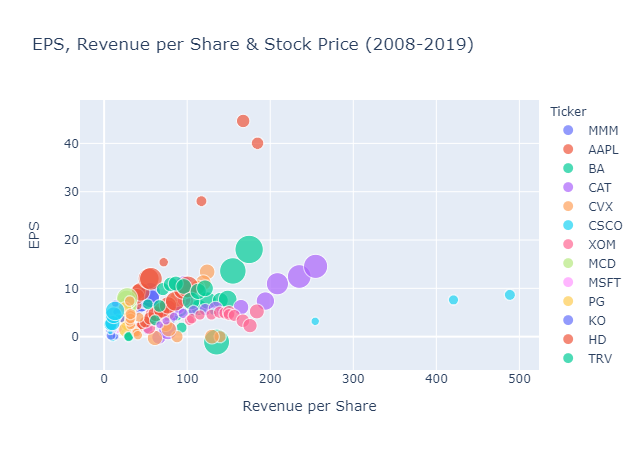

In [24]:
# EPS, Revenue per Share & Stock Price (2008-2019)
px.scatter(
    df_copy,
    x="Revenue per Share",
    y="EPS",
    size="Stock Price",
    color="Ticker",
    title="EPS, Revenue per Share & Stock Price (2008-2019)"
)

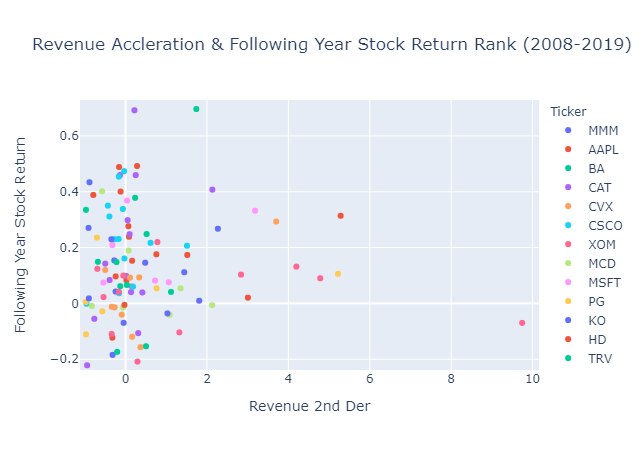

In [83]:
# Revenue Accleration & Following Year Stock Return (2008-2019)
px.scatter(
    df_copy,
    x="Revenue 2nd Der",
    y="Following Year Stock Return",
    #size="Following Year Stock Return Rank",
    color="Ticker",
    hover_name="Ticker", 
    title = "Revenue Accleration & Following Year Stock Return (2008-2019)"
)

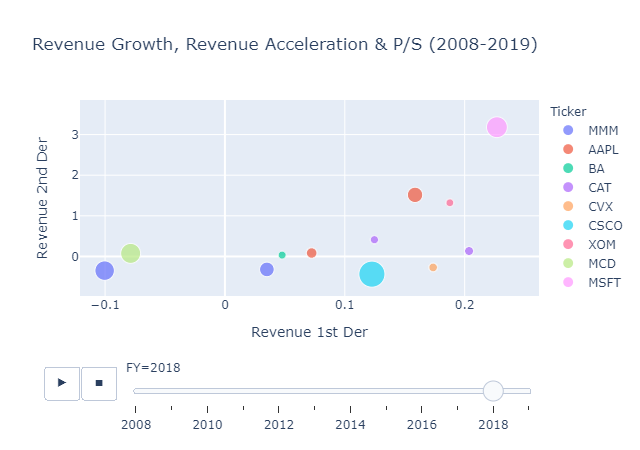

In [25]:
# Revenue Growth, Revenue Acceleration & P/S (2008-2019)
px.scatter(
    df_copy,
    x="Revenue 1st Der",
    y="Revenue 2nd Der",
    size="PS",
    color="Ticker",
    hover_name="Ticker", 
    animation_frame="FY",
    title="Revenue Growth, Revenue Acceleration & P/S (2008-2019)"
)

In [28]:
# Slice data for 2018
df_copy_2018 = df_copy[df_copy['FY']==2018]
df_copy_2018.head()

Year  Month       Date    FY Ticker  Stock Price  Stock Price 1st Der  \
10  2018     12 2018-12-31  2018    MMM       199.27                -0.21   
22  2018      9 2018-09-29  2018   AAPL       212.24                 0.27   
34  2018     12 2018-12-31  2018     BA       387.72                 0.15   
46  2018     12 2018-12-31  2018    CAT       130.11                -0.21   
58  2018     12 2018-12-31  2018    CVX       113.01                -0.10   

    Following Year Stock Return  Stock Price 2nd Der       Revenue  \
10                        -0.18                  nan   32765000000   
22                         0.17                -0.35  265595000000   
34                        -0.17                -0.86  101127000000   
46                         0.04                  nan   54722000000   
58                        -0.01                  nan  166339000000   

    Revenue 1st Der  Revenue 2nd Der  Revenue per Share   PS  PS 1st Der  \
10             0.04            -0.32              55.68 3.58       -0.25   
22             0.16             1.52              53.60 3.96        0.04   
34             0.08              nan             174.60 2.22        0.02   
46             0.20             0.13              92.53 1.41       -0.34   
58             0.17            -0.27              87.69 1.29       -0.23   

    PS 2nd Der   EPS  EPS 1st Der  EPS 2nd Der    PE  PE 1st Der  PE 2nd Der  \
10         nan  9.09         0.12          nan 21.92       -0.29         nan   
22       -0.84 12.01         0.30         1.68 17.67       -0.02         nan   
34       -0.98 18.05         0.33        -0.57 17.62        0.03        1.08   
46         nan 10.39         7.18          nan 12.52       -0.90       -0.22   
58        1.48  7.81         0.60          nan 14.47       -0.44       -0.59   

    Shares Outstanding       Market Cap  
10           588500000  117270395000.00  
22          4955377000 1051729214480.00  
34           579200000  224567424000.00  
46           591400000   76947054000.00  
58          1897000000  214492980000.00

In [29]:
# Create a Following Year Stock Return Rank
df_copy_2018['Following Year Stock Return Rank'] = df_copy_2018['Following Year Stock Return'].rank()
df_copy_2018

C:\Users\david\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Year  Month       Date    FY Ticker  Stock Price  Stock Price 1st Der  \
10   2018     12 2018-12-31  2018    MMM       199.27                -0.21   
22   2018      9 2018-09-29  2018   AAPL       212.24                 0.27   
34   2018     12 2018-12-31  2018     BA       387.72                 0.15   
46   2018     12 2018-12-31  2018    CAT       130.11                -0.21   
58   2018     12 2018-12-31  2018    CVX       113.01                -0.10   
70   2018      7 2018-07-28  2018   CSCO        46.59                 0.48   
82   2018     12 2018-12-31  2018    XOM        72.29                -0.17   
94   2018     12 2018-12-31  2018    MCD       181.77                 0.05   
106  2018      6 2018-06-30  2018   MSFT       105.37                 0.44   
118  2018      6 2018-06-30  2018     PG        80.20                -0.11   
130  2018     12 2018-12-31  2018     KO        47.86                 0.01   
142  2019      2 2019-02-03  2018     HD       184.00                -0.01   
154  2018     12 2018-12-31  2018    TRV       125.88                -0.15   
166  2018     12 2018-12-31  2018    UNH       270.37                 0.14   
178  2018     12 2018-12-31  2018     VZ        54.00                 0.00   
190  2018      9 2018-09-30  2018      V       132.76                 0.21   
202  2019      1 2019-01-31  2018    WMT        97.93                 0.10   

     Following Year Stock Return  Stock Price 2nd Der       Revenue  \
10                         -0.18                  nan   32765000000   
22                          0.17                -0.35  265595000000   
34                         -0.17                -0.86  101127000000   
46                          0.04                  nan   54722000000   
58                         -0.01                  nan  166339000000   
70                          0.01                  nan   49330000000   
82                         -0.10                  nan  290212000000   
94                          0.19                -0.87   21025200000   
106                         0.33                 0.53  110360000000   
118                         0.50                  nan   66832000000   
130                         0.23                -0.93   31856000000   
142                         0.24                  nan  108203000000   
154                         0.07                  nan   30282000000   
166                         0.04                -0.69  226247000000   
178                         0.10                -0.98  130863000000   
190                         0.35                -0.39   20609000000   
202                         0.10                -0.59  514405000000   

     Revenue 1st Der  Revenue 2nd Der  Revenue per Share    PS  PS 1st Der  \
10              0.04            -0.32              55.68  3.58       -0.25   
22              0.16             1.52              53.60  3.96        0.04   
34              0.08              nan             174.60  2.22        0.02   
46              0.20             0.13              92.53  1.41       -0.34   
58              0.17            -0.27              87.69  1.29       -0.23   
70              0.03              nan              10.20  4.57        0.39   
82              0.19             1.32              67.97  1.06       -0.30   
94             -0.08             0.08              27.02  6.73        0.10   
106             0.23             3.18              14.33  7.35        0.17   
118             0.03              nan              26.42  3.04       -0.16   
130            -0.10            -0.35               7.48  6.40        0.12   
142             0.07             0.08              95.17  1.93       -0.10   
154             0.05             0.03             113.25  1.11       -0.22   
166             0.12             0.41             234.94  1.15        0.01   
178             0.04            88.39              31.70  1.70       -0.02   
190             0.12            -0.44              11.50 11.54        0.0

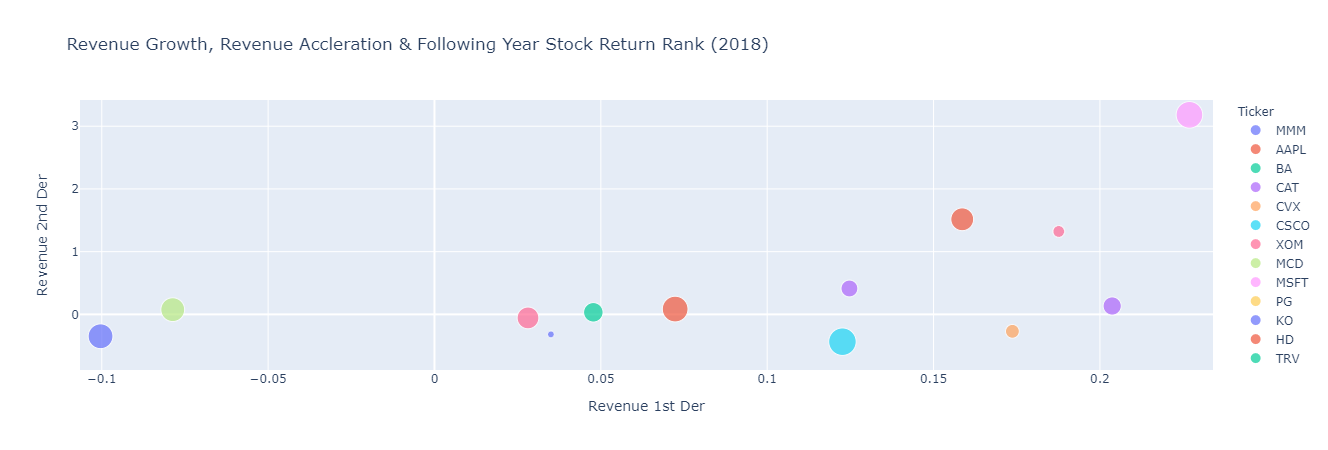

In [94]:
# Revenue Growth, Revenue Accleration & Following Year Stock Return Rank (2018)
px.scatter(
    df_copy_2018,
    x="Revenue 1st Der",
    y="Revenue 2nd Der",
    size="Following Year Stock Return Rank",
    color="Ticker",
    hover_name="Ticker", 
    title = "Revenue Growth, Revenue Accleration & Following Year Stock Return Rank (2018)"
)

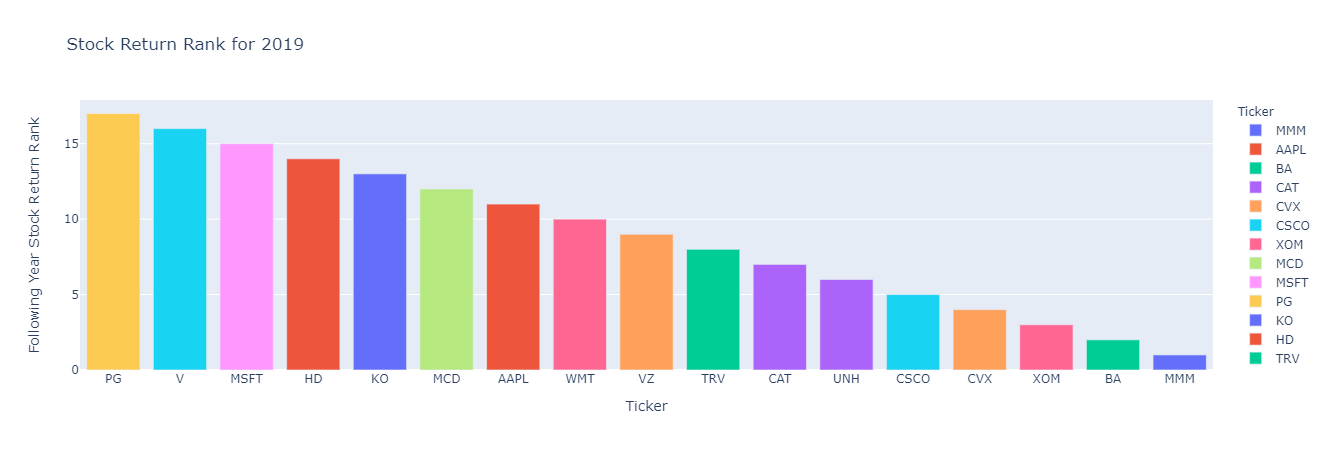

In [30]:
# Stock Return Rank for 2019
stock_return_rank_2019_plot = px.bar(
    df_copy_2018,
    x="Ticker",
    y="Following Year Stock Return Rank",
    color="Ticker",
    title = "Stock Return Rank for 2019"
)

stock_return_rank_2019_plot.update_layout(xaxis = {'categoryorder':'total descending'})

In [32]:
## Stock Price Trend over the period from 2007 - 2018
cor1_analy=df_copy[['FY','Ticker','Following Year Stock Return']]

#Pivot the to align the ticker and return 
cor_price_rev=cor1_analy.pivot_table(values='Following Year Stock Return',index='FY',columns='Ticker')
cor_price_rev.head()

Ticker  AAPL   BA   CAT  CSCO  CVX   HD   KO   MCD   MMM  MSFT    PG  TRV  \
FY                                                                          
2008    1.20 0.43  0.69 -0.09 0.02 0.66 0.27  0.08  0.50 -0.09 -0.16 0.31   
2009    0.53 0.14  0.83 -0.08 0.29 0.17 0.15  0.17  0.09  0.08  0.09 0.10   
2010    0.31 0.07  0.15 -0.23  nan 0.28 0.08  0.35 -0.00  0.06  0.01 0.04   
2011    0.49 0.01 -0.11  0.23 0.13 0.49 0.11 -0.04  0.15  0.08  0.06 0.34   
2012   -0.12 0.70 -0.06  0.23 0.00 0.18 0.02 -0.01  0.27  0.07  0.24 0.06   

Ticker  UNH    V    VZ  WMT   XOM  
FY                                 
2008   0.16 0.40 -0.01  nan -0.16  
2009   0.24 0.03  0.29 0.02  0.23  
2010   0.25 0.22  0.06 0.13  0.08  
2011   0.10 0.45  0.16 0.22  0.06  
2012   0.30 0.47  0.09 0.04  0.04

#### Correlation Analysis

The correlation analysis is performed for each ticket and the scope is to understand if there is any significant relationship of first and second deriavtive parameter with stock return.
We used Pandas dataframe.corr() methond and heatmap from seaborn package to get the numerical and graphical representation of correlation values respectively; and filter out the strongly correlated values which are more than 0.7.

In [51]:
cor2_data_fy=df_copy.loc[cor1_analy['FY']== input()]
cor2_data=df_copy.loc[cor1_analy['Ticker']== input()]
plot_cor2=cor2_data.set_index('FY')
plot_cor2.drop(columns=['Month','Date','Year','Ticker','Stock Price','Revenue','PE','Shares Outstanding','Market Cap','Stock Price 1st Der'],inplace= True)
correlation1=plot_cor2.corr()
correlation1

 2018
 MSFT


Following Year Stock Return  Stock Price 2nd Der  \
Following Year Stock Return                         1.00                -0.26   
Stock Price 2nd Der                                -0.26                 1.00   
Revenue 1st Der                                     0.03                -0.14   
Revenue 2nd Der                                     0.34                 0.32   
Revenue per Share                                   0.73                -0.11   
PS                                                  0.62                -0.08   
PS 1st Der                                          0.50                 0.64   
PS 2nd Der                                         -0.50                -0.12   
EPS                                                 0.34                -0.08   
EPS 1st Der                                         0.24                -0.07   
EPS 2nd Der                                         0.27                -0.99   
PE 1st Der                                          0.02                 0.02   
PE 2nd Der                                         -0.52                -0.98   

                             Revenue 1st Der  Revenue 2nd Der  \
Following Year Stock Return             0.03             0.34   
Stock Price 2nd Der                    -0.14             0.32   
Revenue 1st Der                         1.00             0.85   
Revenue 2nd Der                         0.85             1.00   
Revenue per Share                       0.52             0.25   
PS                                      0.41             0.33   
PS 1st Der                              0.03             0.43   
PS 2nd Der                              0.07            -0.07   
EPS                                     0.36            -0.20   
EPS 1st Der                             0.03            -0.26   
EPS 2nd Der                            -0.21            -1.00   
PE 1st Der                              0.33             0.37   
PE 2nd Der                              0.21            -1.00   

                             Revenue per Share    PS  PS 1st Der  PS 2nd Der  \
Following Year Stock Return               0.73  0.62        0.50       -0.50   
Stock Price 2nd Der                      -0.11 -0.08        0.64       -0.12   
Revenue 1st Der                           0.52  0.41        0.03        0.07   
Revenue 2nd Der                           0.25  0.33        0.43       -0.07   
Revenue per Share                         1.00  0.89        0.63       -0.39   
PS                                        0.89  1.00        0.64       -0.44   
PS 1st Der                                0.63  0.64        1.00       -0.60   
PS 2nd Der                               -0.39 -0.44       -0.60        1.00   
EPS                                       0.64  0.65        0.34       -0.08   
EPS 1st Der                               0.44  0.55        0.34       -0.10   
EPS 2nd Der                              -0.43 -0.01       -0.75        0.57   
PE 1st Der                                0.13 -0.07       -0.03       -0.15   
PE 2nd Der                                0.10 -0.60       -0.61        1.00   

                              EPS  EPS 1st Der  EPS 2nd Der  PE 1st Der  \
Following Year Stock Return  0.34         0.24         0.27        0.02   
Stock Price 2nd Der         -0.08        -0.07        -0.99        0.02   
Revenue 1st Der              0.36         0.03        -0.21        0.33   
Revenue 2nd Der             -0.20        -0.26        -1.00        0.37   
Revenue per Share            0.64         0.44        -0.43        0.13   
PS                           0.65         0.55        -0.01       -0.07   
PS 1st Der                   0.34         0.34        -0.75       -0.03   
PS 2nd Der                  -0.08        -0.10         0.57       -0.15   
EPS                          1.00         0.90         0.93       -0.58   
EPS 1st Der                  0.90         1.00         0.96       -0.82   
EPS 2nd Der                  0.93    

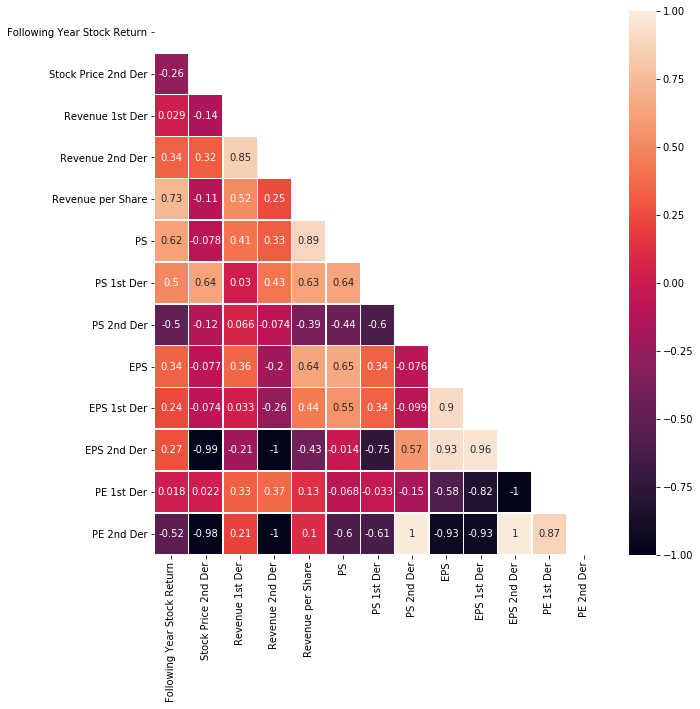

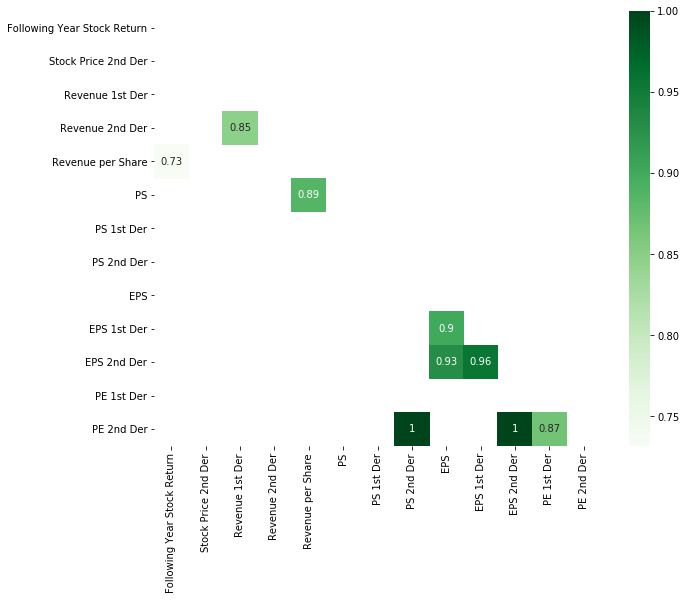

In [54]:
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(correlation1, dtype=np.bool))
sns.heatmap(correlation1, mask=mask,vmin=-1, vmax=1,annot=True,linewidths=.5)

#Strong correlation above 0.7 is good
kot = correlation1[correlation1>=.7]
plt.figure(figsize=(10,8))
sns.heatmap(kot, mask=mask,annot=True,cmap="Greens")